# CASE KOGNITALAB

* Contexto geral - A empresa X-Health atua no comércio B2B vendendo dispositivos eletrônicos voltados para saúde com amplo espectro de preços, e de variada sofisticação/complexidade.

* Sobre as vendas - As vendas são feitas à crédito: o cliente B2B faz seu pedido e paga (à vista ou em várias parcelas, conforme o combinado pelo time de vendas) num tempo futuro pré-determinado.

* O problema - O time financeiro da X-Health tem observado um número indesejável de não-pagamentos ('default' ou calote, em bom português).

* O objetivo - Querem de alguma forma minimizar esse fenômeno. Desejam uma solução capaz de identificar os clientes podem vir o dar o default (ou 'calote').

## Importação das bibliotecas

Estas são as bibilotecas ou pacotes utilizados para organização, tratamento, representação e análise dos dados.

In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import preprocessing
import xgboost as xgb

## Importação da base de dados

A base de dados utilizada aqui foi extraída do repositório do exercício no formato Excel (.xlsx), realizando os devidos ajustes necessários.

In [327]:
df = pd.read_excel(r"C:\Users\miche\Downloads\dataset_2021-5-26-10-14.xlsx")

In [328]:
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.000000,0.0,2.421007e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.850000,0.0,4.960846e+06,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.830000,0.0,1.586319e+05,1,1800.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.640000,0.0,6.696442e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.000000,0.0,2.010560e+03,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.0,5.406733e+05,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.0,3.373146e+03,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.0,3.362163e+03,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.0,1.388990e+04,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1


# Análise exploratória dos dados

O primeiro passo do exercício é realizar uma análise exploratória dos dados. O objetivo desta seção é (1) identificar as principais tendências descritivas e distributivas de cada variável e (2) buscar correlações entre as variáveis, especialmente em relação à ocorrência de default. Utilizamos aqui algumas métricas e recursos gráficos para extrair essas informações da base de dados.

## Estatísticas descritivas e distribuições

Começamos observando, para algumas variáveis, as frequências relativas e histogramas.

In [383]:
m = df.default.mean() #este valor será útil como referência no futuro, indica a frequência de defaults
m

0.16666240311069044

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


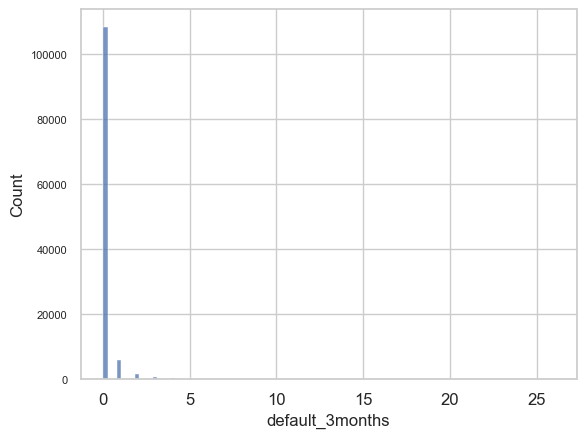

In [384]:
sns.histplot(df.default_3months, bins=100)
plt.rcParams['legend.fontsize'] = 2
plt.savefig('default_3months.png')
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


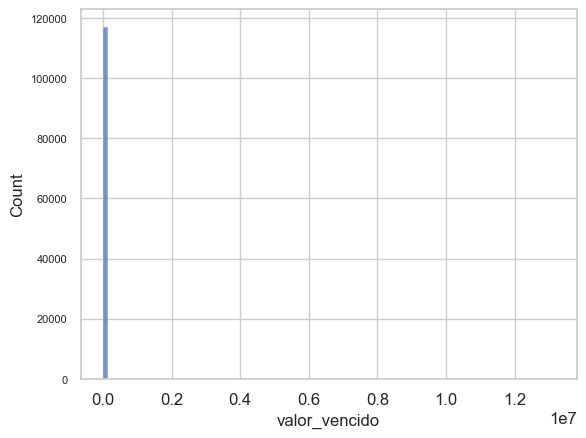

In [385]:
sns.histplot(df.valor_vencido, bins=100)
plt.rcParams['legend.fontsize'] = 2
plt.savefig('valor_vencido.png')
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


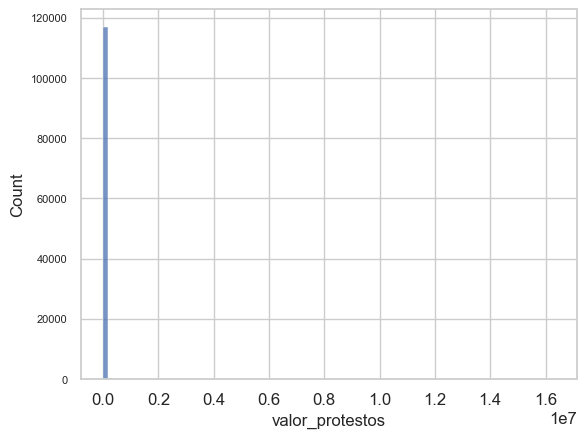

In [386]:
sns.histplot(df.valor_protestos, bins=100)
plt.rcParams['legend.fontsize'] = 2
plt.savefig('valor_protestos.png')
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


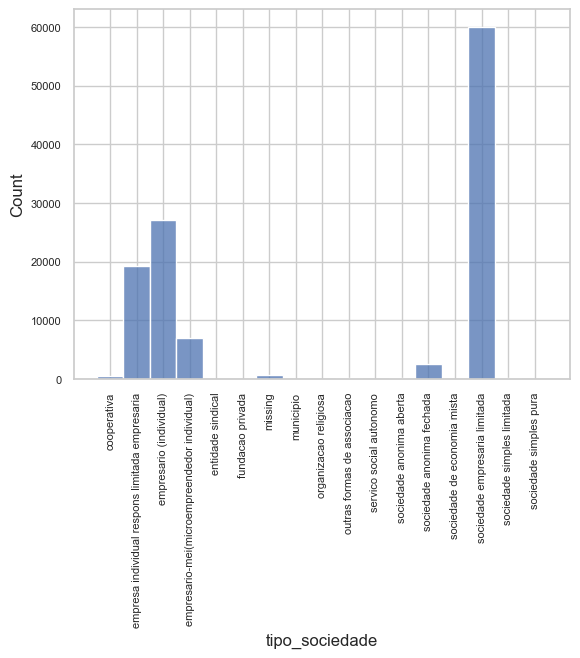

In [365]:
sns.histplot(df.tipo_sociedade)
plt.rcParams['legend.fontsize'] = 2
plt.rcParams['xtick.labelsize'] = 6
plt.xticks(rotation=90)
plt.savefig('tipo_sociedade.png')
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


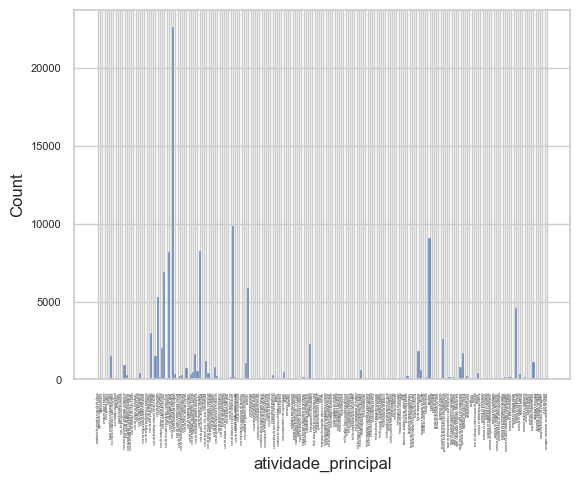

In [371]:
sns.histplot(df.atividade_principal)
plt.rcParams['legend.fontsize'] = 2
plt.rcParams['xtick.labelsize'] = 1
plt.xticks(rotation=90)
plt.savefig('tipo_sociedade.png')
plt.show()

C:\Users\miche\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


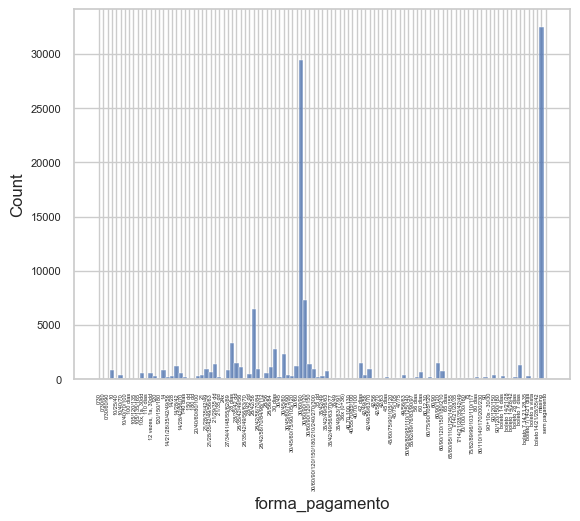

In [368]:
sns.histplot(df.forma_pagamento)
plt.rcParams['legend.fontsize'] = 2
plt.rcParams['xtick.labelsize'] = 2
plt.xticks(rotation=90)
plt.savefig('forma_pagamento.png')
plt.show()

## Correlações e default por categoria

A partir de agora, chamamos de _features_ o conjunto das variáveis com exceção do default. O objetivo final do case é conseguir prever, a partir do conhecimento das features, a ocorrência de default. Por isso, analisamos as relações existentes entre as variáveis, com foco na relação de cada feature com a ocorrência de default. Começamos observando a correlação linear entre as variáveis numéricas.

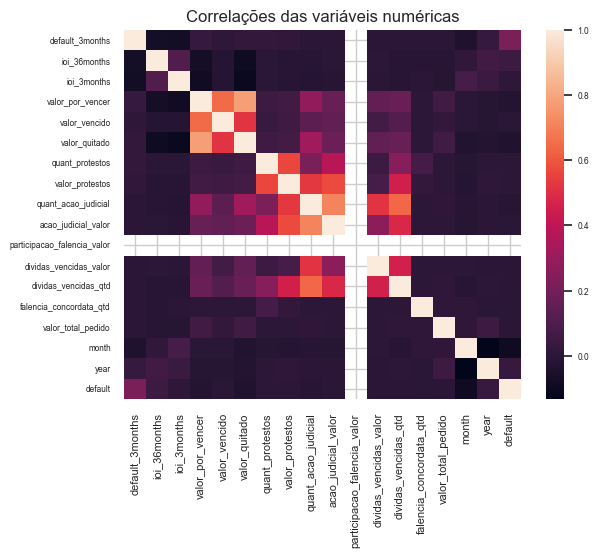

In [363]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr).set_title('Correlações das variáveis numéricas')
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.savefig('correlacao.png')
plt.show()

Para o caso das features qualitativas, como as categorias não são binárias, não conseguimos calcular uma correlação explícita com a ocorrência de default. A abordagem utilizada aqui é separar as features por categorias e, para cada categoria, avaliar a frequência de default. Caso a variabilidade da frequência de default entre as categorias de uma mesma feature seja grande o suficiente, então podemos assumir que esta feature e a ocorrência de default não são independentes. Isso não significa necessariamente que exista uma relação de causalidade direta, mas a feature em questão passa a ser relevante para o nosso problema. Para calcular a variabilidade, utilizamos o coeficiente de variação (desvio padrão/média).

C:\Users\miche\AppData\Local\Temp\ipykernel_24644\2769196745.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = df.groupby('tipo_sociedade').default.mean()
C:\Users\miche\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


1.2602692665850521


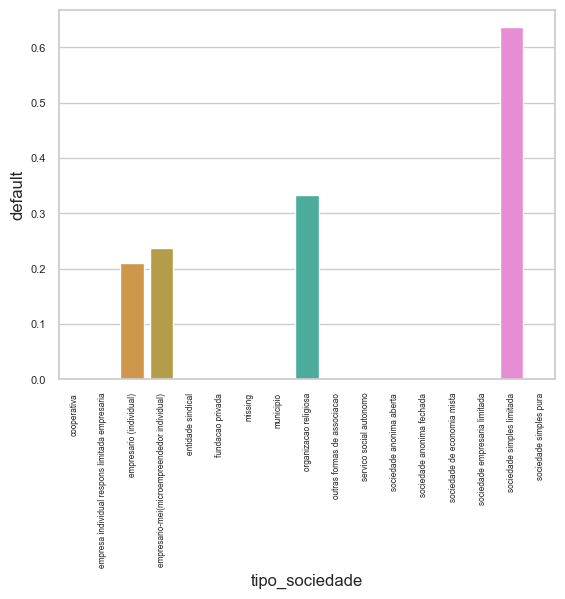

In [374]:
s = df.groupby('tipo_sociedade').default.mean()
print(sp.stats.variation(s))
s = s.sort_values(ascending=False)
s = s.loc[(s>m)]
sns.barplot(x=s.index, y=s)
plt.rcParams['xtick.labelsize'] = 6
plt.xticks(rotation=90)
plt.savefig('tipo_sociedade2.png')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_24644\1300132768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = df.groupby('forma_pagamento').default.mean()
C:\Users\miche\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


1.2033912352354594


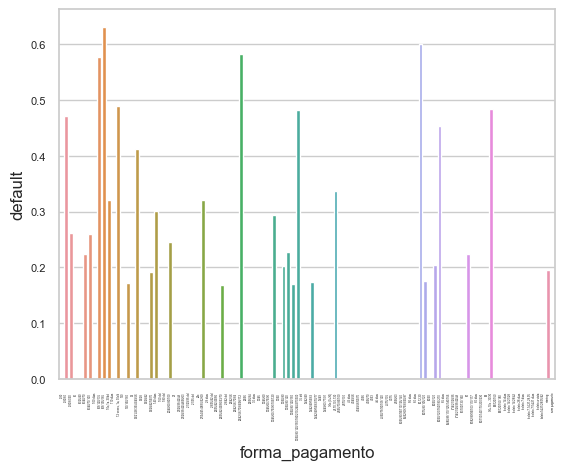

In [377]:
s = df.groupby('forma_pagamento').default.mean()
print(sp.stats.variation(s))
s = s.sort_values(ascending=False)
s = s.loc[(s>m)]
sns.barplot(x=s.index, y=s)
plt.rcParams['xtick.labelsize'] = 2
plt.xticks(rotation=90)
plt.savefig('forma_pagamento2.png')
plt.show()

C:\Users\miche\AppData\Local\Temp\ipykernel_24644\3384430102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s = df.groupby('atividade_principal').default.mean()
C:\Users\miche\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


1.4446055156624185


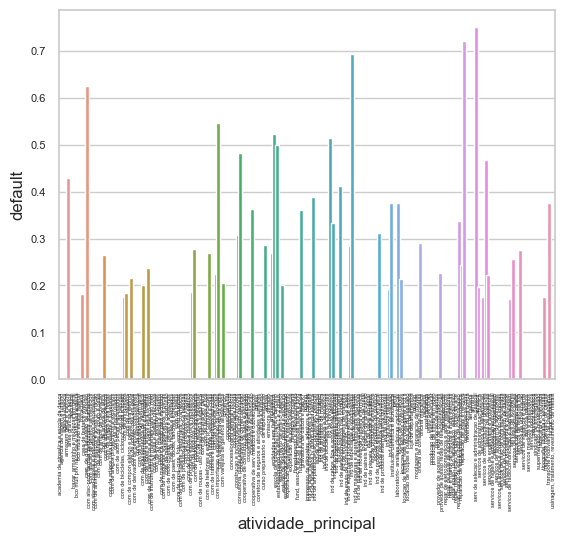

In [401]:
s = df.groupby('atividade_principal').default.mean()
print(sp.stats.variation(s))
s = s.sort_values(ascending=False)
s = s.loc[(s>m)]
sns.barplot(x=s.index, y=s, width=1.6)
plt.rcParams['xtick.labelsize'] = 2
plt.xticks(rotation=90)
plt.savefig('atividade_principal2.png')
plt.show()

# Implementação do Gradient Boosting

Agora podemos implementar o Gradient Boosting Classifier. Para isso, primeiro trasnformamos as variáveis qualitativas do tipo 'object' para o tipo 'category'. Em seguida, separamos a base de dados em treino (75%) e teste (25%), e aplicamos o classificador. Por fim, avaliamos, a acurácia do método e o peso de cada feature nas Árvores de Decisão do Gradient Boost Classifier.

In [343]:
cat_cols = ['tipo_sociedade', 'opcao_tributaria', 'atividade_principal', 'forma_pagamento']
for col in cat_cols:
    df[col] = df[col].astype('category')

In [381]:
X = df[df.columns[0:21]]
y = df.default
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25)
y_train.mean(), y_test.mean()
clf = xgb.XGBClassifier(tree_method='hist', enable_categorical=True)
clf.fit(X_train, y_train)
imp = clf.feature_importances_

0.9115590572666189


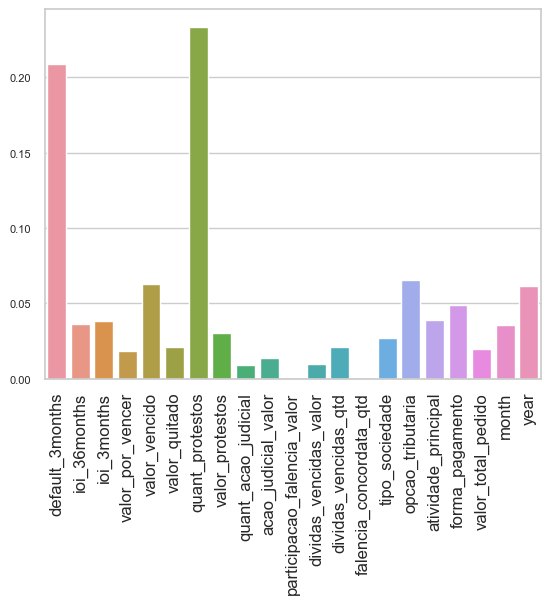

In [382]:
print(clf.score(X_test, y_test))
sns.barplot(x=X.columns, y=imp)
plt.rcParams['xtick.labelsize'] = 12
plt.xticks(rotation=90)
plt.savefig('importancia.png')
plt.show()